In [61]:
import pandas as pd
#f = open("avocado.csv")
avo_data = pd.read_csv("./avocado_data/avocado.csv")#name folder, then file

#avo_data
new_avo_data = avo_data.drop(["Total Volume","Total Bags","4046","4225","4770","Small Bags","Large Bags", "XLarge Bags","type","year","region","Unnamed: 0"],axis = 1)
new_avo_data.head()
#new_avo_data[new_avo_data["AveragePrice"].isnull()]

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28


In [56]:
new_avo_data["Date"][1][3]

'5'

In [70]:
new_avo_data["Date"][1] = new_avo_data["Date"][1].split("-")
new_avo_data["Date"][1]

AttributeError: 'list' object has no attribute 'split'

In [90]:
def original_2015():
    for i in range(len(new_avo_data["Date"])):
        if new_avo_data["Date"][i][3] == "5":
            a = new_avo_data["Date"][i].split("-")
            del a[1]
            del a[1]
    new_avo_data["Date"] = new_avo_data["Date"].replace([new_avo_data["Date"][i]],a)

In [91]:
original_2015
new_avo_data["Date"]

0            [2015]
1            [2015]
2            [2015]
3            [2015]
4            [2015]
            ...    
18244    2018-02-04
18245    2018-01-28
18246    2018-01-21
18247    2018-01-14
18248    2018-01-07
Name: Date, Length: 18249, dtype: object

In [71]:
avo_data.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [86]:
shorten = round(avo_data[["AveragePrice", "year"]].groupby("year").mean(),2)#["AveragePrice", "year"] means select both columns.  Add extra brackets to select multiple rows.  Year was set as an index
shorten.reset_index(inplace = True)
shorten

,year,AveragePrice
0,2015,1.38
1,2016,1.34
2,2017,1.52
3,2018,1.35


In [72]:
avo_data["year"].unique()

array([2015, 2016, 2017, 2018])

In [68]:
original_2015()

<ipython-input-67-a90f070cf41d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_avo_data["Date"][i] = new_avo_data["Date"][i].split("-")


2018-01-07


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


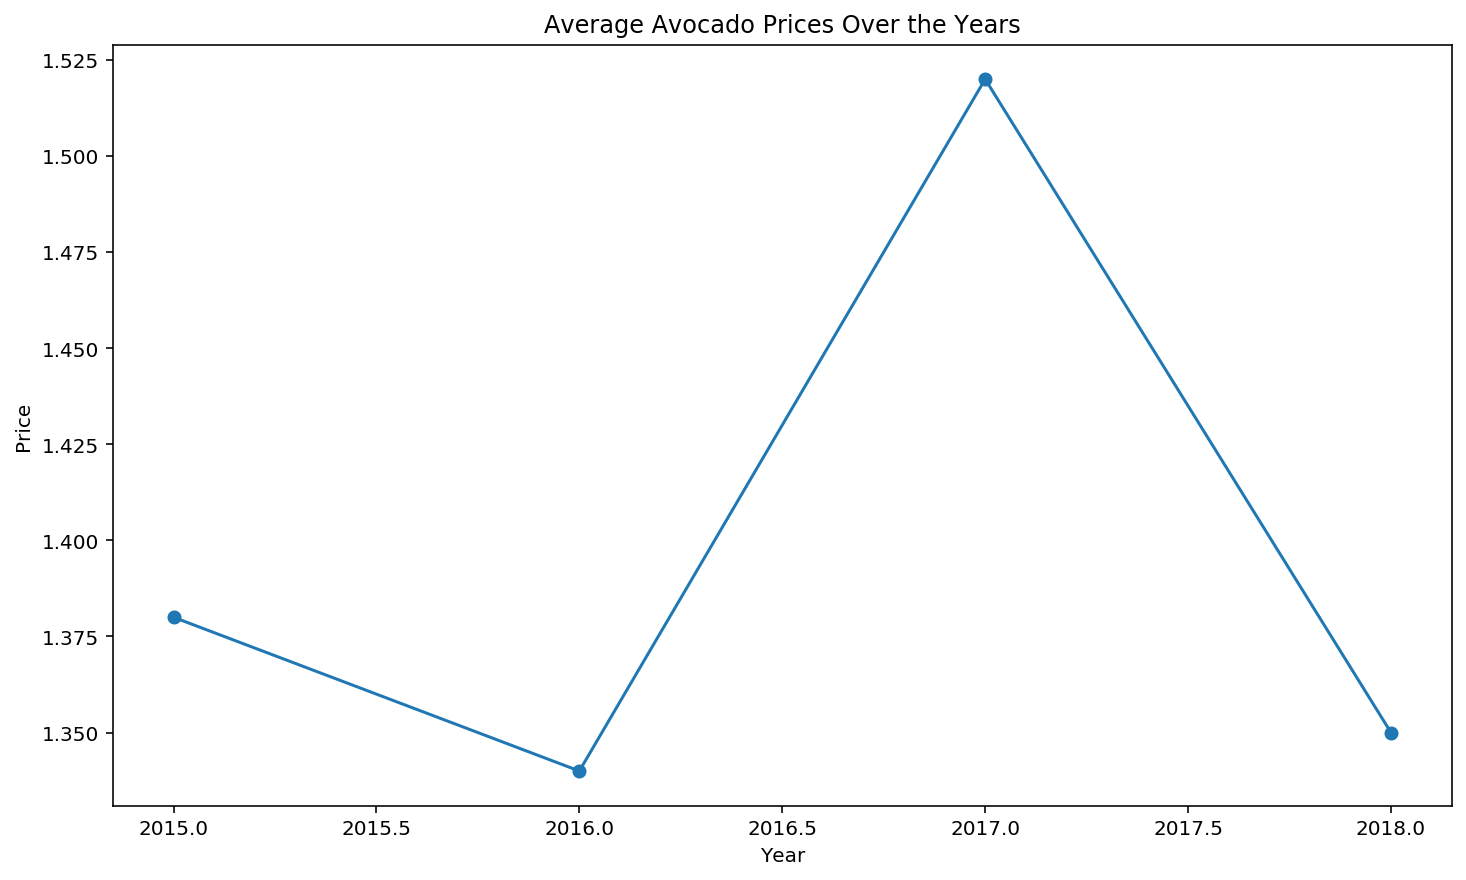

In [87]:
import matplotlib.pyplot as plt
plt.plot(shorten['year'], shorten['AveragePrice'], marker='o')



plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Average Avocado Prices Over the Years")

plt.show()
